In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#Defining Geometric Brownian Motion
def gen_paths(S0, mu, sigma, T, N, I):
    dt = float(T) / N
    paths = np.zeros((N + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, N + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
# initializing values
S0 = 8.5
mu = 0.17534428695090384
sigma = 1.9347344196447369 #Standard deviation + 1
T = 1
N = 8
deltat = T / N

#Number of simulations
i = 10000

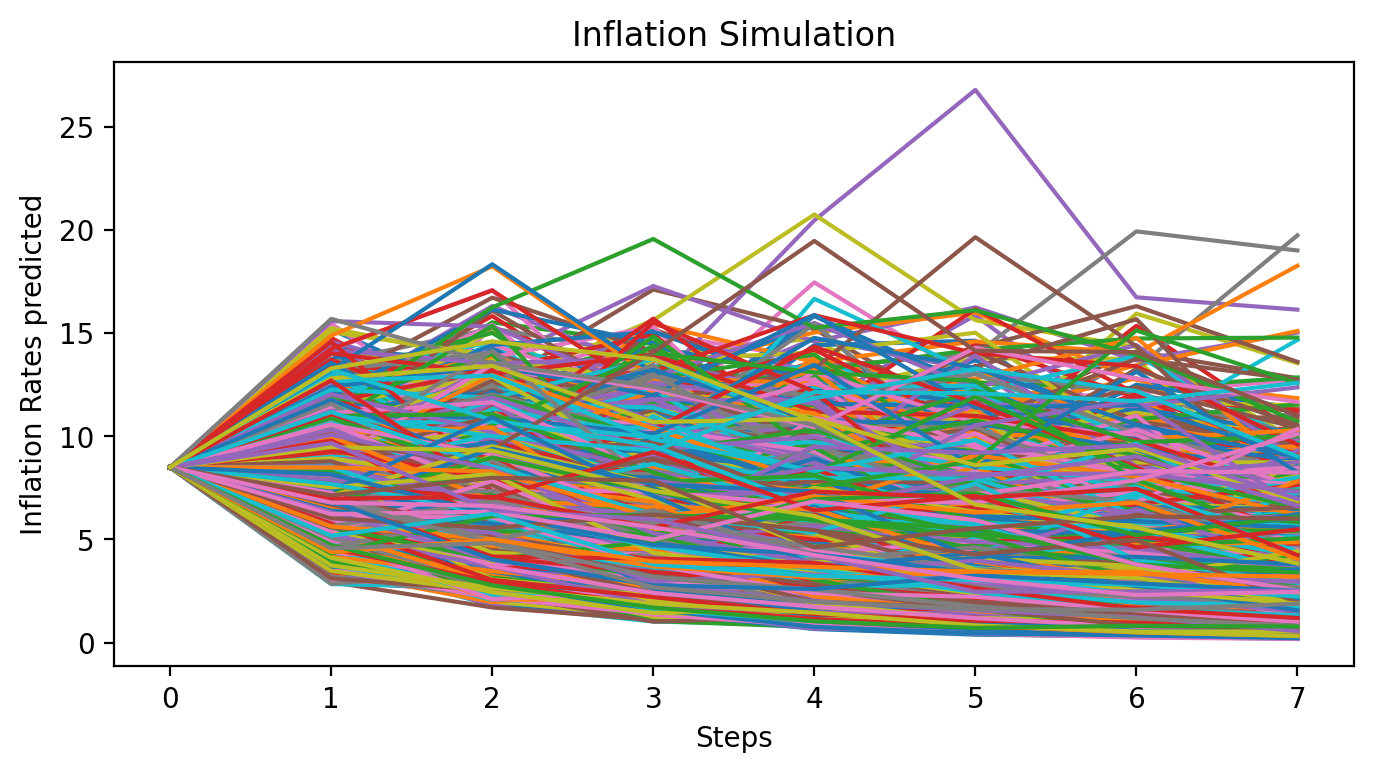

In [4]:
#looping for Monte-Carlo Simulations of the GBM
plt.figure(figsize=(8,4),dpi=200)
S = np.zeros([i,N])
t = range(0,N,1)

for y in range(0,i-1):
    S[y,0]=S0
    for x in range(0,N-1):
        S[y,x+1] = S[y,x]*(np.exp((mu-(sigma**2)/2)*deltat + sigma*deltat*np.random.normal(0,1)))
    plt.plot(t,S[y])
    
plt.title('Inflation Simulation')
plt.xlabel('Steps')
plt.ylabel('Inflation Rates predicted')
plt.show()

In [6]:
#Finding Metrics
S_max          = [S[:, i].max() for i in range(0, int(N))]
S_mean          = [S[:, i].mean() for i in range(0, int(N))]

In [7]:
S_mean

[8.49915,
 7.07410981153797,
 5.876745750770373,
 4.896860873156576,
 4.073254072960279,
 3.3964620176000673,
 2.838951660588719,
 2.3708472824559337]

In [8]:
#Importing Data for comparative study
df=pd.read_excel(r"C:\Users\abhunia\OneDrive - Great American Insurance Group\Desktop\FinalCompar.xlsx")
df

,Timestep,Survey Mean,GAIG preds
0,Q1 22,8.5,8.500000
1,Q2 22,7.9,7.358618
2,Q3 22,7.5,5.885517
3,Q4 22,6.3,5.440467
4,Q1 23,4.7,4.695043
5,Q2 23,3.5,3.444658
6,Q3 23,2.9,2.871509
7,Q4 23,2.7,2.447175


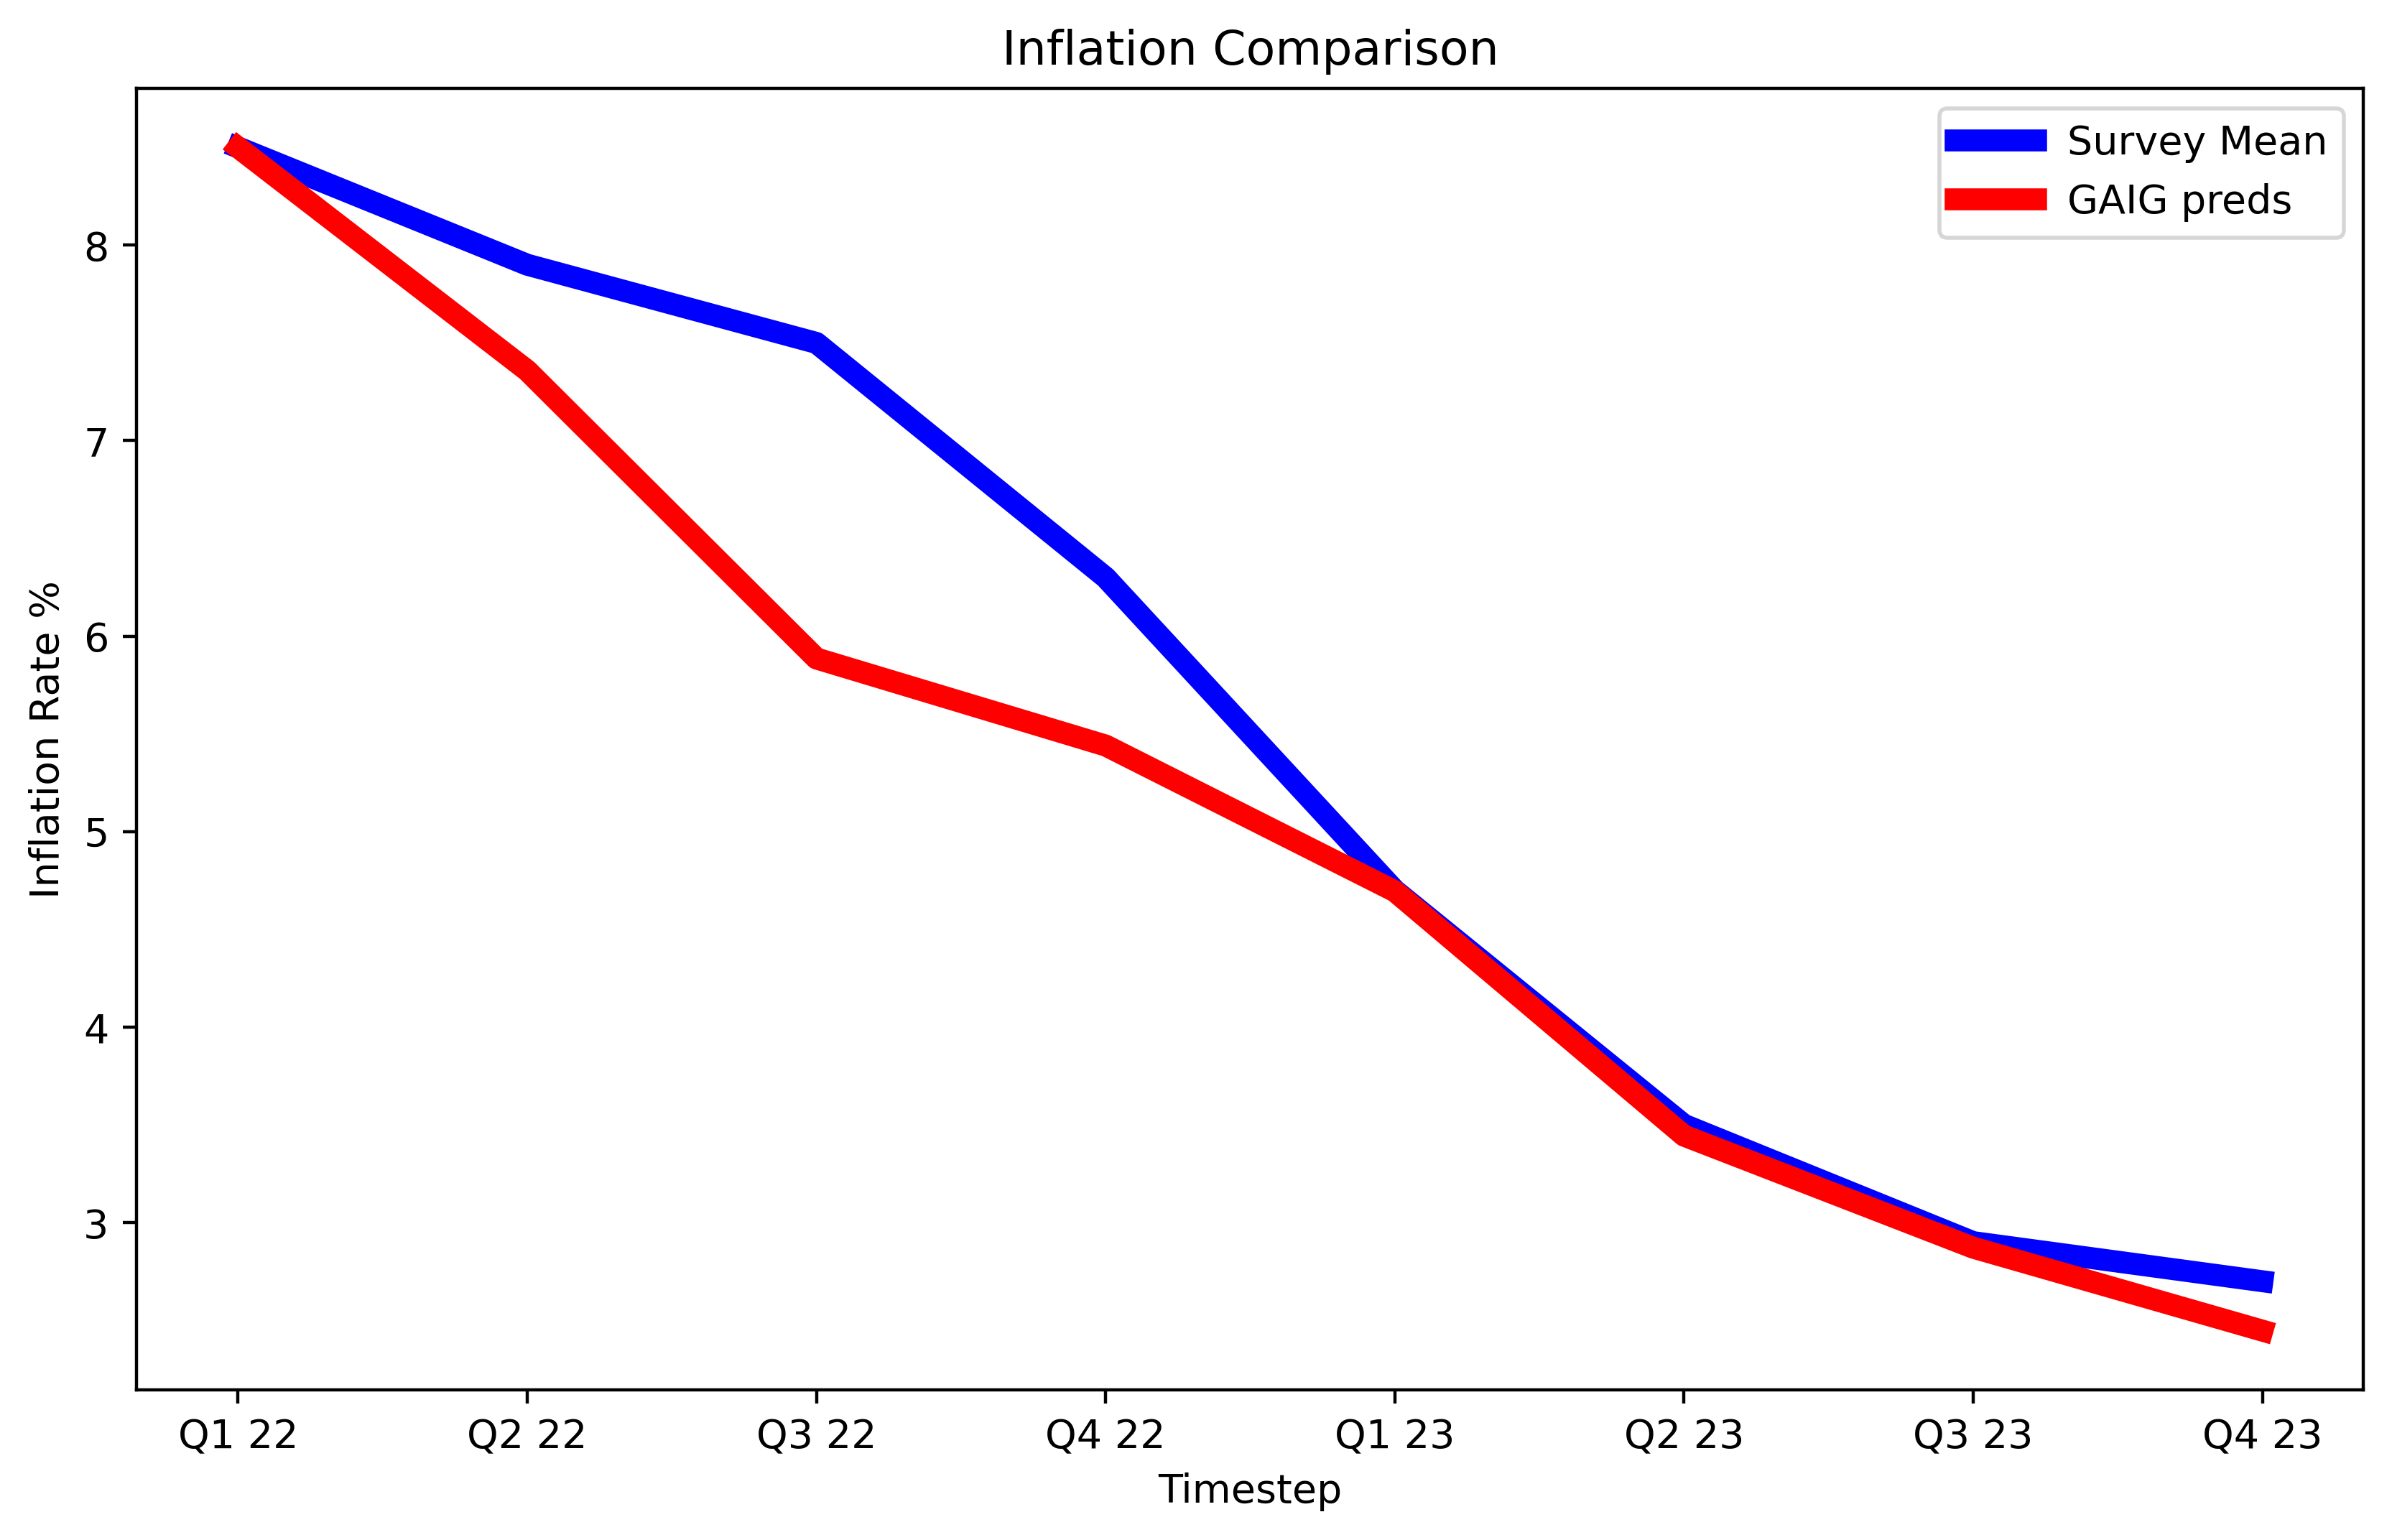

In [9]:
#Plotting comparisons
Survey=df["Survey Mean"]
Preds=df["GAIG preds"]
Timestep=df["Timestep"]


plt.figure(figsize=(10,6),dpi=400)
plt.plot(Timestep,Survey,color='blue',label="Survey Mean",linewidth=5.5)
plt.plot(Timestep,Preds,color='red',label="GAIG preds",linewidth=5.5)


plt.xlabel("Timestep")
plt.ylabel("Inflation Rate %")
plt.title("Inflation Comparison")

plt.legend()